In [1]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt



In [2]:
X,y=mglearn.datasets.make_forge()

/opt/anaconda3/envs/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


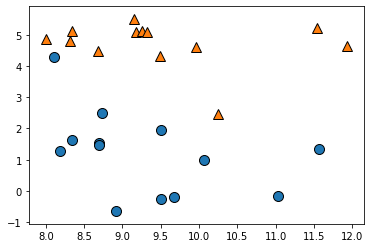

In [3]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

/opt/anaconda3/envs/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


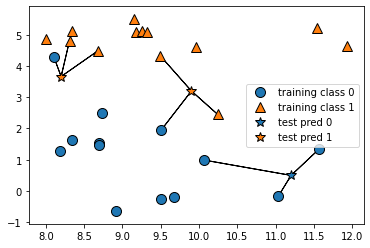

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X,y=mglearn.datasets.make_forge()

/opt/anaconda3/envs/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [11]:
knn=KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
knn.predict(x_test)

array([1, 0, 1, 0, 1, 0, 0])

In [16]:
knn.score(x_test,y_test)

0.8571428571428571

# 이웃의 수를 늘리면 과적합 현상이 적어짐 허나 너무 크면 underfitting 현상 발생


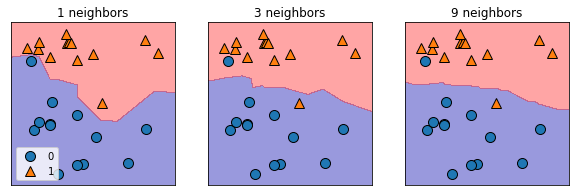

In [20]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax,in zip([1,3,9],axes):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(knn,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
axes[0].legend(loc=3)    

# 이웃의 수에 따라 성능에 어떠한 영향을 미치는지 유방암 데이터셋을 통해 확인


In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
cancer=load_breast_cancer()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target)

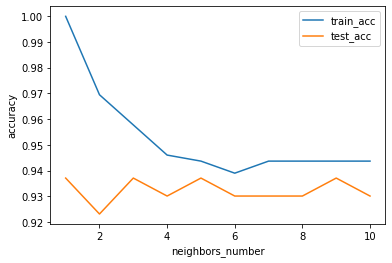

In [26]:
train_acc=[]
test_acc=[]

neighbors_setting=range(1,11)

for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    
    train_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,train_acc,label='train_acc')
plt.plot(neighbors_setting,test_acc,label='test_acc')
plt.ylabel('accuracy')
plt.xlabel('neighbors_number')
plt.legend()

# neighbor의 수에따라 성능 차이 시각화